<a href="https://colab.research.google.com/github/AkerkeKesha/stacked-unets/blob/main/gcolab_etci_flood_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set up plotting options
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
gdrive_root = '/content/drive/MyDrive/stacked-unet/dataset/etci-flood-dataset'
gdrive_root

'/content/drive/MyDrive/stacked-unet/dataset/etci-flood-dataset'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!git clone https://github.com/AkerkeKesha/stacked-unets.git

Cloning into 'stacked-unets'...
remote: Enumerating objects: 1126, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 1126 (delta 152), reused 180 (delta 94), pack-reused 880
Receiving objects: 100% (1126/1126), 5.64 MiB | 24.04 MiB/s, done.
Resolving deltas: 100% (756/756), done.


In [5]:
%cd stacked-unets

/content/stacked-unets


In [6]:
%pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.7 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=f23904e70e036ef6e139b5b885106c966ab55d74e962fca82ccaefd103cf2ee6
  Stored in direct

In [7]:
!mkdir -p /content/stacked-unets/dataset/data-etci-flood

In [8]:
!unzip -q $gdrive_root/train.zip -d /content/stacked-unets/dataset/data-etci-flood

# Couple check ups

In [9]:
%pwd

'/content/stacked-unets'

In [ ]:
!git stash

Saved working directory and index state WIP on main: b992f1f chores: improved output path name


In [14]:
!git fetch

remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 10 (delta 6), reused 10 (delta 6), pack-reused 0
Unpacking objects: 100% (10/10), 975 bytes | 487.00 KiB/s, done.
From https://github.com/AkerkeKesha/stacked-unets
   156bf17..8ffacaa  main       -> origin/main


In [15]:
!git pull

Updating 156bf17..8ffacaa
Fast-forward
 config.py    | 4 ++--
 set_env.sh   | 4 ++--
 src/train.py | 2 +-
 3 files changed, 5 insertions(+), 5 deletions(-)


In [10]:
import torch

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

Mon Sep 25 21:20:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
from psutil import virtual_memory

ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [12]:
import sys

sys.path.append('/content/stacked-unets/src')

In [13]:
import os

os.environ['ENVIRONMENT'] = 'colab'
os.environ['DATASET'] = 'etci'
os.environ['STOP'] = 'yes'

In [14]:
import os
from glob import glob
import config


train_dir = config.train_dir

print(f"Is colab: {config.dataset}")
print(f"Is colab: {config.environment}")

print(f"Number of training temporal-regions: {len(glob(train_dir+'/*/'))}")

Is colab: etci
Is colab: colab
Number of training temporal-regions: 31


Split into train:(20019, 6), validation:(2502, 6), and test:(2503, 6)
Level: [1 / 5]


  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Generating semantic maps for train dataset...


  0%|          | 0/418 [00:00<?, ?it/s]

Generating semantic maps for val dataset...


  0%|          | 0/53 [00:00<?, ?it/s]

Takes2297.466712474823 seconds to train in 1
Done saving evaluation metrics/losses on train/val


100%|██████████| 53/53 [00:40<00:00,  1.29it/s]


Mean IoU for the test dataset: 0.7342094245016538
Overall average entropy for the entire test set: 0.0412
Level: [2 / 5]


  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: [10 / 20]
Train mean IoU = 0.7753
Train mean loss = 0.0379


  0%|          | 0/53 [00:00<?, ?it/s]

Val mean IoU = 0.7610
Val mean loss = 0.0356


  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: [20 / 20]
Train mean IoU = 0.8068
Train mean loss = 0.0326


  0%|          | 0/53 [00:00<?, ?it/s]

Val mean IoU = 0.7774
Val mean loss = 0.0331
Generating semantic maps for train dataset...


  0%|          | 0/418 [00:00<?, ?it/s]

Generating semantic maps for val dataset...


  0%|          | 0/53 [00:00<?, ?it/s]

Takes8523.873070001602 seconds to train in 2
Done saving evaluation metrics/losses on train/val


100%|██████████| 53/53 [00:40<00:00,  1.32it/s]


Mean IoU for the test dataset: 0.7532750745932761
Overall average entropy for the entire test set: 0.0332
Level: [3 / 5]


  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: [10 / 20]
Train mean IoU = 0.7936
Train mean loss = 0.0348


  0%|          | 0/53 [00:00<?, ?it/s]

Val mean IoU = 0.7896
Val mean loss = 0.0318


  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: [20 / 20]
Train mean IoU = 0.8169
Train mean loss = 0.0309


  0%|          | 0/53 [00:00<?, ?it/s]

Val mean IoU = 0.7662
Val mean loss = 0.0303
Generating semantic maps for train dataset...


  0%|          | 0/418 [00:00<?, ?it/s]

Generating semantic maps for val dataset...


  0%|          | 0/53 [00:00<?, ?it/s]

Takes8482.311603307724 seconds to train in 3
Done saving evaluation metrics/losses on train/val


100%|██████████| 53/53 [00:38<00:00,  1.38it/s]


Mean IoU for the test dataset: 0.7471642338339044
Overall average entropy for the entire test set: 0.0238
Level: [4 / 5]


  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: [10 / 20]
Train mean IoU = 0.7689
Train mean loss = 0.0378


  0%|          | 0/53 [00:00<?, ?it/s]

Val mean IoU = 0.7660
Val mean loss = 0.0398


  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: [20 / 20]
Train mean IoU = 0.8143
Train mean loss = 0.0324


  0%|          | 0/53 [00:00<?, ?it/s]

Val mean IoU = 0.7795
Val mean loss = 0.0327
Generating semantic maps for train dataset...


  0%|          | 0/418 [00:00<?, ?it/s]

Generating semantic maps for val dataset...


  0%|          | 0/53 [00:00<?, ?it/s]

Takes8407.298837661743 seconds to train in 4
Done saving evaluation metrics/losses on train/val


100%|██████████| 53/53 [00:38<00:00,  1.36it/s]


Mean IoU for the test dataset: 0.7541517844163926
Overall average entropy for the entire test set: 0.0304
Level: [5 / 5]


  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: [10 / 20]
Train mean IoU = 0.7717
Train mean loss = 0.0376


  0%|          | 0/53 [00:00<?, ?it/s]

Val mean IoU = 0.7724
Val mean loss = 0.0324


  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: [20 / 20]
Train mean IoU = 0.8012
Train mean loss = 0.0330


  0%|          | 0/53 [00:00<?, ?it/s]

Val mean IoU = 0.7801
Val mean loss = 0.0345
Generating semantic maps for train dataset...


  0%|          | 0/418 [00:00<?, ?it/s]

Generating semantic maps for val dataset...


  0%|          | 0/53 [00:00<?, ?it/s]

Takes8402.97425198555 seconds to train in 5
Done saving evaluation metrics/losses on train/val


100%|██████████| 53/53 [00:38<00:00,  1.38it/s]


Mean IoU for the test dataset: 0.763645314097384
Overall average entropy for the entire test set: 0.0367


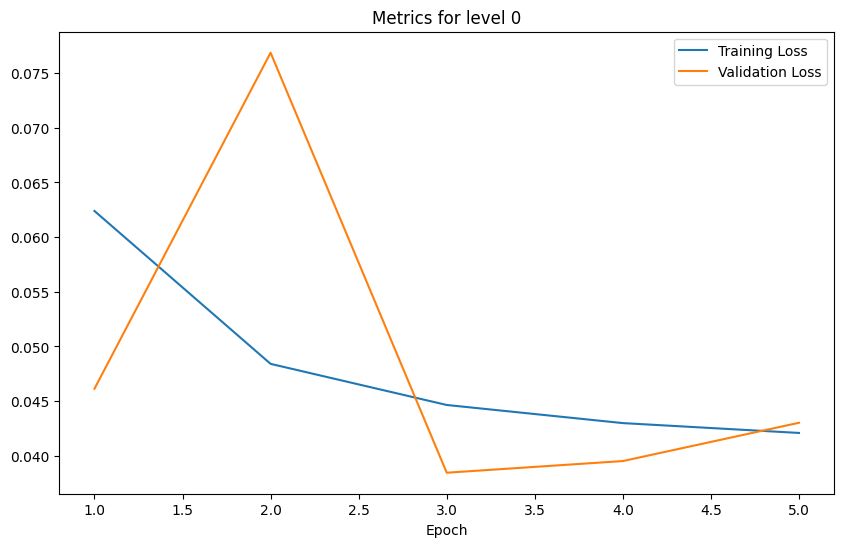

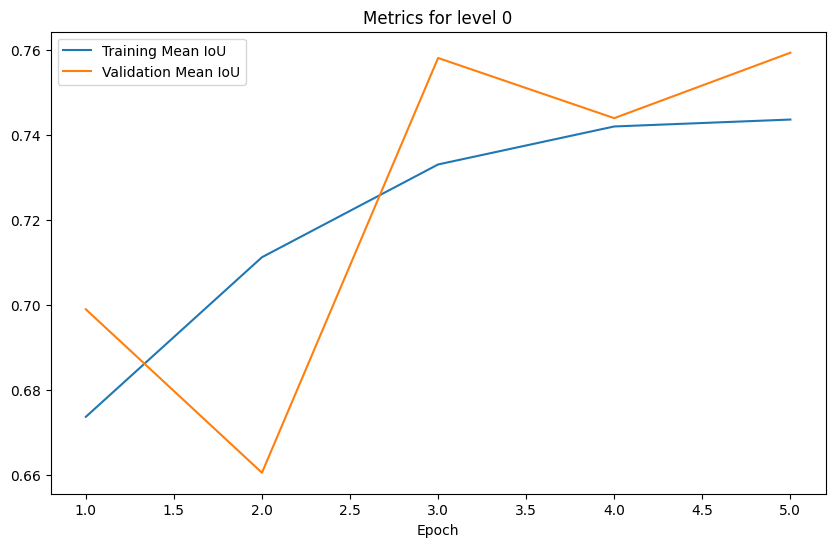

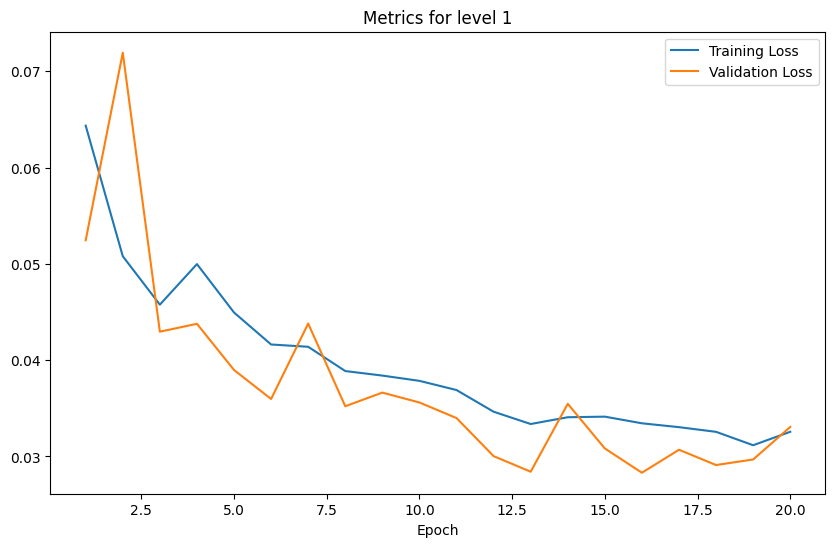

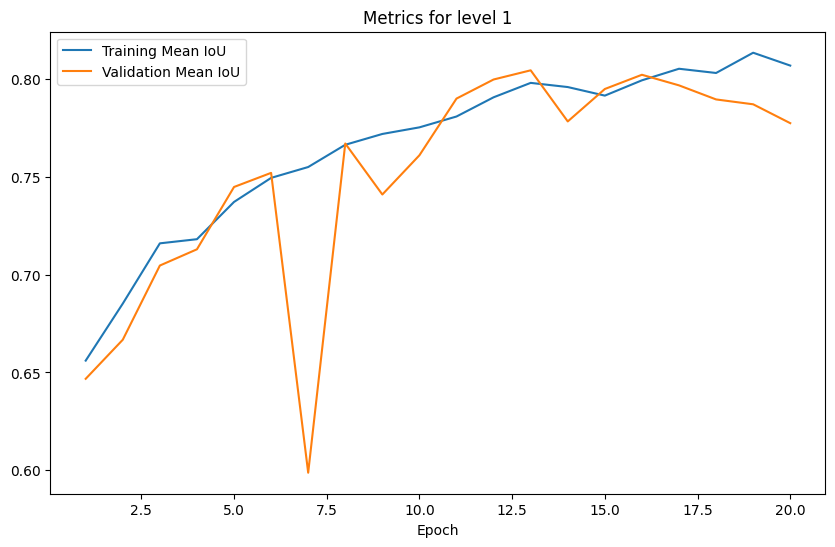

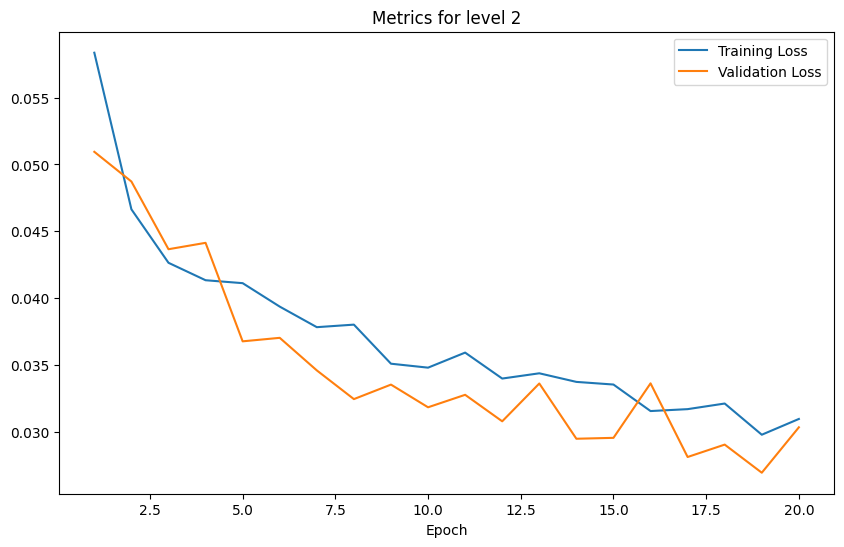

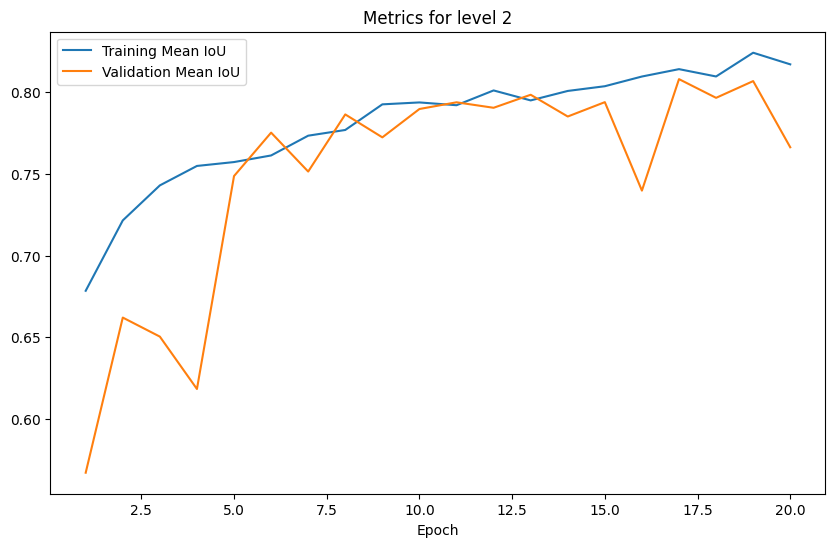

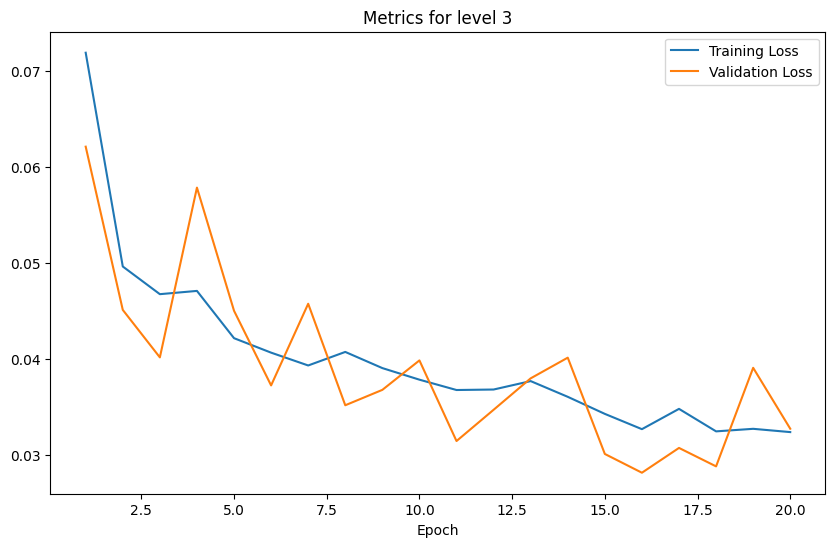

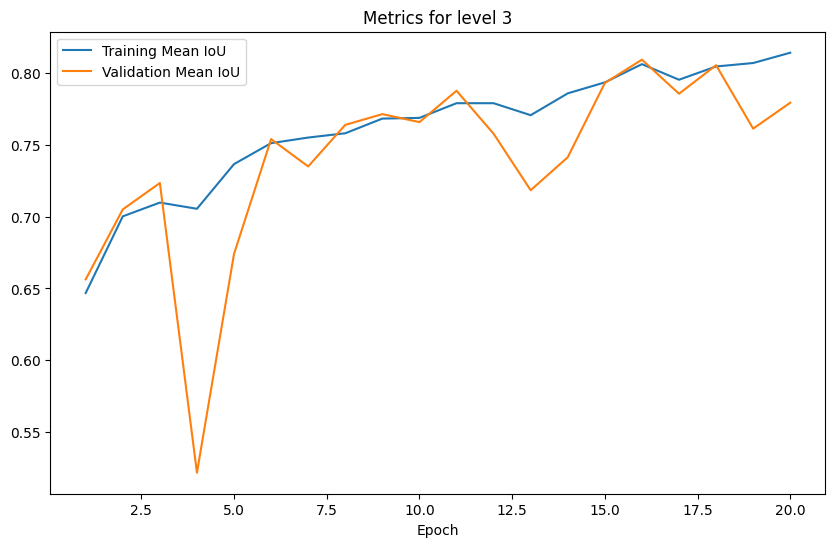

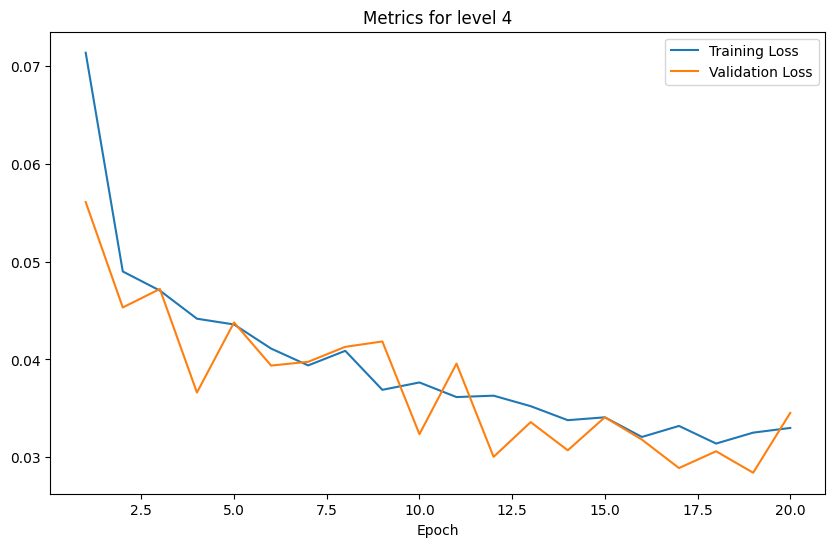

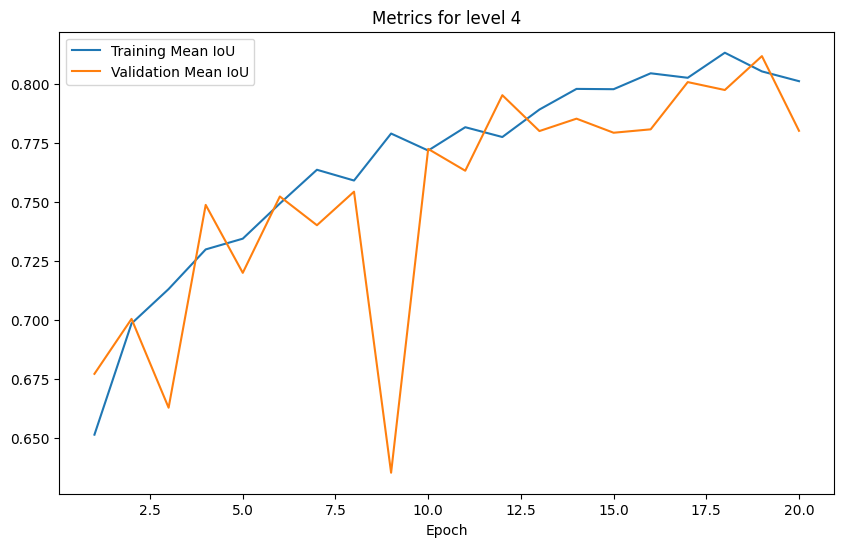

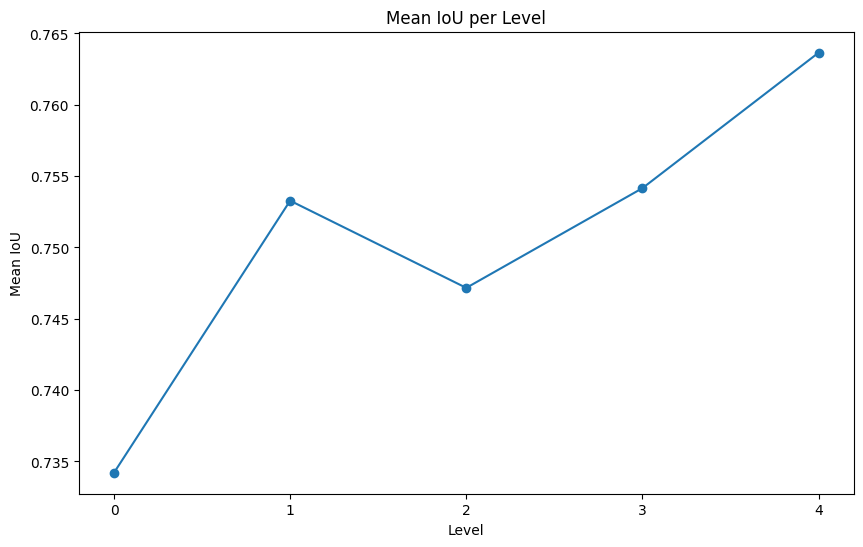

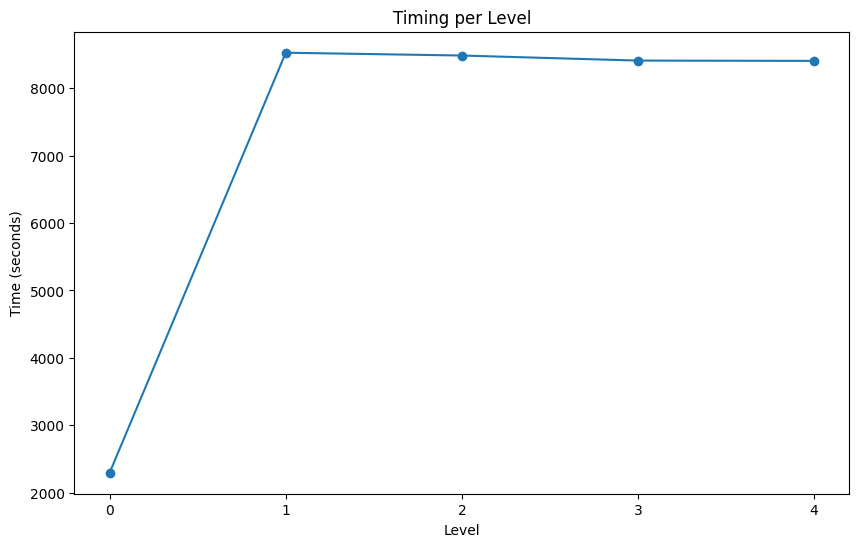

Done plotting results


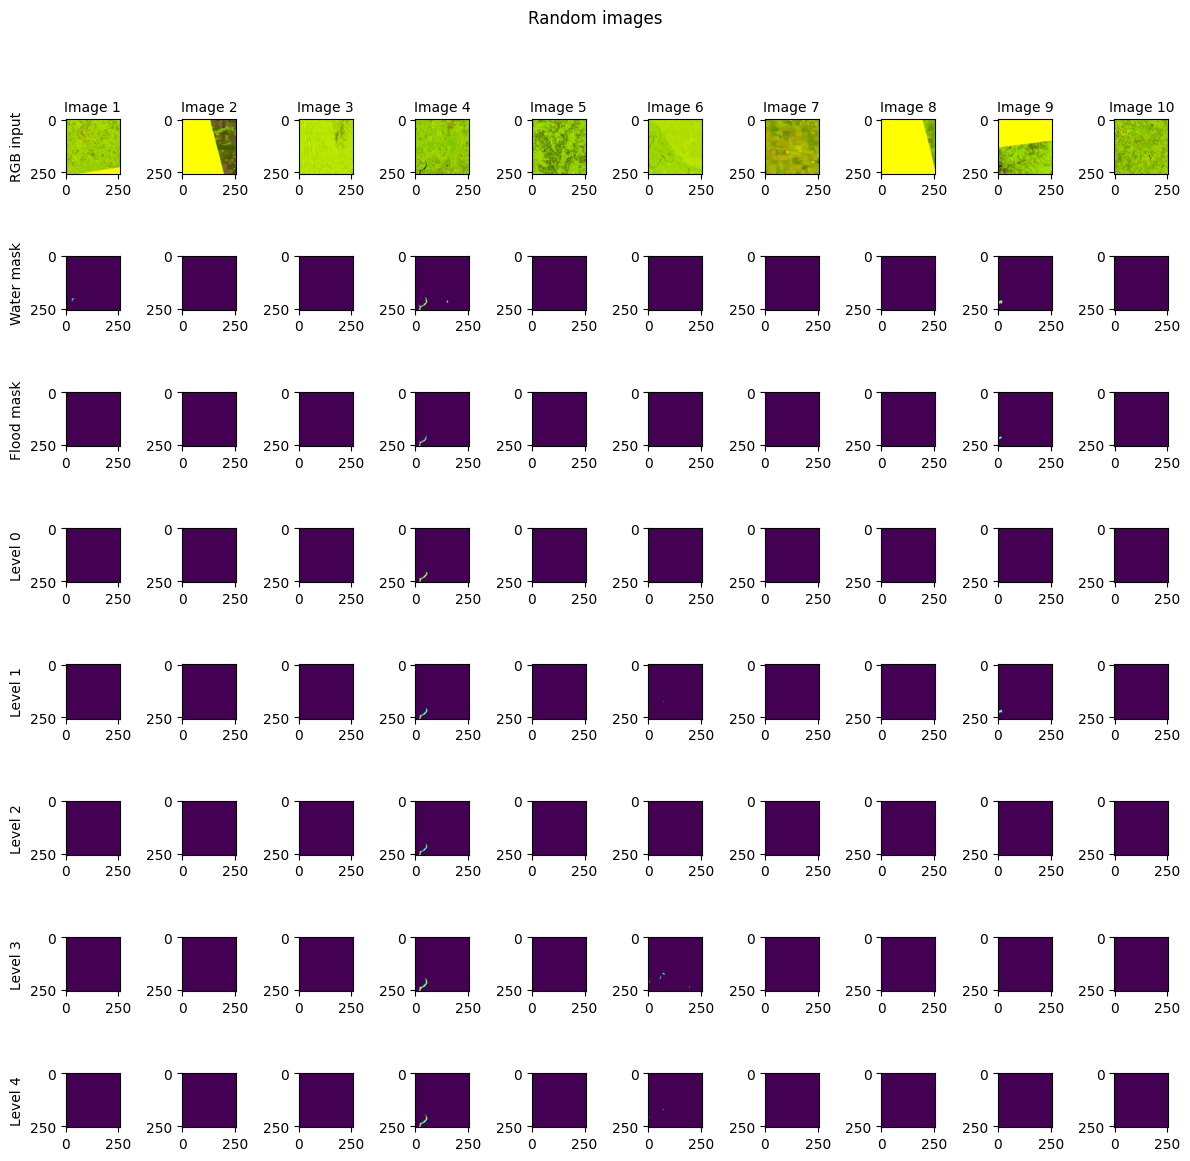

In [15]:
from src.main import start_stacked_unet

start_stacked_unet(n_levels=5)

In [17]:
!zip -r output_5level.zip output > /dev/null 2>&1

In [18]:
!cp output_5level.zip "/content/drive/MyDrive/stacked-unet/output_5level.zip"

In [16]:
!ls output/etci_labels | wc -l

125120


In [ ]:
 # !cp "/content/drive/MyDrive/stacked-unet/output_3level.zip" output_3level.zip

In [ ]:
# !unzip output_3level.zip

unzip:  cannot find or open output_3level.zip, output_3level.zip.zip or output_3level.zip.ZIP.


In [19]:
from src.analyze import collect_metrics_from_files, plot_metrics

metrics_dict = collect_metrics_from_files(metrics_base_names=["train_losses", "val_losses", "train_iou", "val_iou"], source_dir=f"{config.output_dir}", levels=[0, 1, 2, 3, 4], dataset="etci")

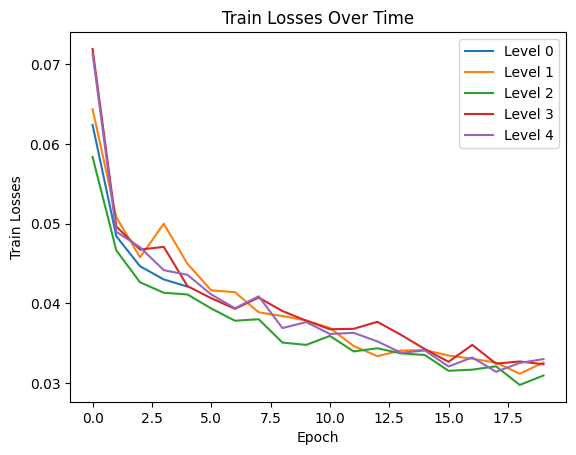

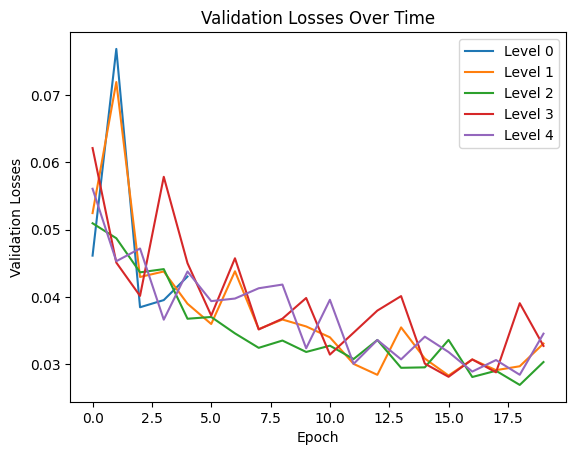

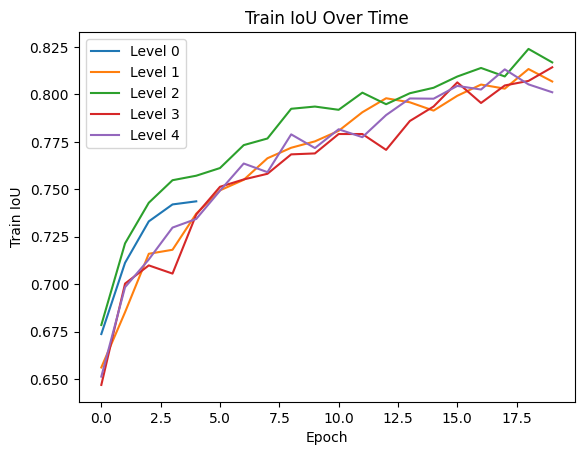

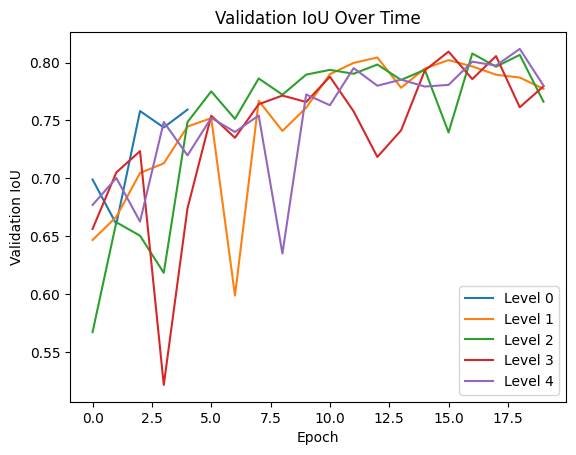

In [20]:
plot_metrics(metrics_dict['train_losses'], metric_name='Train Losses')
plot_metrics(metrics_dict['val_losses'], metric_name='Validation Losses')
plot_metrics(metrics_dict['train_iou'], metric_name='Train IoU')
plot_metrics(metrics_dict['val_iou'], metric_name='Validation IoU')

In [21]:
from src.distort import distort_semantic_maps, load_semantic_map, predict_with_distortion

original_semantic_maps = load_semantic_map(config.labels_dir, target_level=3)

In [22]:
import torch

distorted_semantic_maps = distort_semantic_maps(original_semantic_maps)
distorted_semantic_maps = [torch.Tensor(map_) for map_ in distorted_semantic_maps]

In [23]:
import numpy as np
import pandas as pd

loaded_dict = np.load(f'{config.output_dir}/test_df.npy', allow_pickle=True).item()
test_df = pd.DataFrame.from_dict(loaded_dict)
test_df = test_df.reset_index(drop=True)

In [24]:
test_df.shape

(2503, 6)

In [25]:
import albumentations as A
from torch.utils.data import DataLoader
from src.dataset import ETCIDataset


test_dataset = ETCIDataset(dataframe=test_df, split="test", transform=None)
test_loader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers)

In [26]:
final_predictions, new_df_test, new_mean_iou = predict_with_distortion(test_loader=test_loader,
    df_test=test_df,
    level=3,
    distorted_semantic_maps=distorted_semantic_maps
)

100%|██████████| 53/53 [00:38<00:00,  1.39it/s]

Mean IoU for the test dataset with distorted semantic maps: 0.7247997544631661


In [27]:
target_level=0
original_semantic_maps = load_semantic_map(config.labels_dir, target_level)
distorted_semantic_maps = distort_semantic_maps(original_semantic_maps)
distorted_semantic_maps = [torch.Tensor(map_) for map_ in distorted_semantic_maps]
final_predictions, new_df_test, new_mean_iou = predict_with_distortion(test_loader=test_loader,
    df_test=test_df,
    level=target_level,
    distorted_semantic_maps=distorted_semantic_maps
)

100%|██████████| 53/53 [00:36<00:00,  1.44it/s]

Mean IoU for the test dataset with distorted semantic maps: 0.6463186653845175


In [28]:
target_level=1
original_semantic_maps = load_semantic_map(config.labels_dir, target_level)
distorted_semantic_maps = distort_semantic_maps(original_semantic_maps)
distorted_semantic_maps = [torch.Tensor(map_) for map_ in distorted_semantic_maps]
final_predictions, new_df_test, new_mean_iou = predict_with_distortion(test_loader=test_loader,
    df_test=test_df,
    level=target_level,
    distorted_semantic_maps=distorted_semantic_maps
)

100%|██████████| 53/53 [00:36<00:00,  1.46it/s]

Mean IoU for the test dataset with distorted semantic maps: 0.7419930799420265


In [29]:
target_level=2
original_semantic_maps = load_semantic_map(config.labels_dir, target_level)
distorted_semantic_maps = distort_semantic_maps(original_semantic_maps)
distorted_semantic_maps = [torch.Tensor(map_) for map_ in distorted_semantic_maps]
final_predictions, new_df_test, new_mean_iou = predict_with_distortion(test_loader=test_loader,
    df_test=test_df,
    level=target_level,
    distorted_semantic_maps=distorted_semantic_maps
)

100%|██████████| 53/53 [00:37<00:00,  1.43it/s]

Mean IoU for the test dataset with distorted semantic maps: 0.7684650163294129


In [30]:
target_level=3
original_semantic_maps = load_semantic_map(config.labels_dir, target_level)
distorted_semantic_maps = distort_semantic_maps(original_semantic_maps)
distorted_semantic_maps = [torch.Tensor(map_) for map_ in distorted_semantic_maps]
final_predictions, new_df_test, new_mean_iou = predict_with_distortion(test_loader=test_loader,
    df_test=test_df,
    level=target_level,
    distorted_semantic_maps=distorted_semantic_maps
)

100%|██████████| 53/53 [00:36<00:00,  1.43it/s]

Mean IoU for the test dataset with distorted semantic maps: 0.7248712548623668


In [31]:
target_level=4
original_semantic_maps = load_semantic_map(config.labels_dir, target_level)
distorted_semantic_maps = distort_semantic_maps(original_semantic_maps)
distorted_semantic_maps = [torch.Tensor(map_) for map_ in distorted_semantic_maps]
final_predictions, new_df_test, new_mean_iou = predict_with_distortion(test_loader=test_loader,
    df_test=test_df,
    level=target_level,
    distorted_semantic_maps=distorted_semantic_maps
)

100%|██████████| 53/53 [00:36<00:00,  1.44it/s]

Mean IoU for the test dataset with distorted semantic maps: 0.7758158663159533
